<a href="https://colab.research.google.com/github/sinjy1203/deep-learning/blob/master/handson_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!git clone https://github.com/sinjy1203/deep-learning.git

fatal: destination path 'deep-learning' already exists and is not an empty directory.


In [10]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
from sklearn.datasets import make_moons
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
m = 1000
x_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

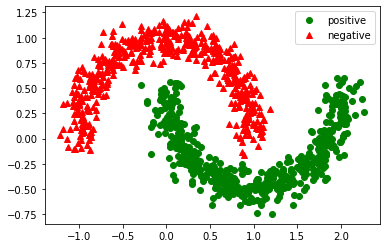

In [12]:
plt.plot(x_moons[y_moons == 1, 0], x_moons[y_moons == 1, 1], 'go', label = 'positive')
plt.plot(x_moons[y_moons == 0, 0], x_moons[y_moons == 0, 1], 'r^', label='negative')
plt.legend()
plt.show()

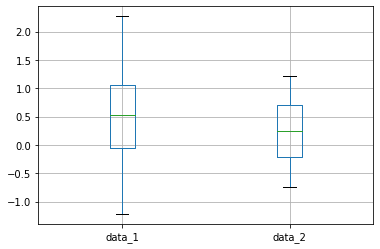

In [13]:
import pandas as pd
data = np.c_[x_moons, y_moons]
df = pd.DataFrame(data)
df.columns = ['data_1', 'data_2', 'y']
df.boxplot(column=['data_1', 'data_2'])

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)
train_y = train["y"]
train_x = train.drop(columns="y")
test_y = test["y"]
test_x = test.drop(columns="y")
std_scaler = StandardScaler()
train_x = std_scaler.fit_transform(train_x)
test_x = std_scaler.transform(test_x)

In [0]:
train_y = np.array(train_y)
train_y = train_y.reshape(-1, 1)
train_y.shape
test_y = np.array(test_y)
test_y = test_y.reshape(-1, 1)

0.08175388
0.08175135
0.08174882
0.08174631
0.08174383
0.081741355
0.081738904
0.08173646
0.08173405
0.08173165
0.88


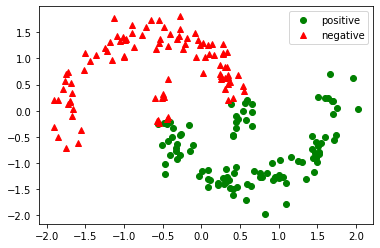

In [16]:
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)
x = tf.placeholder(dtype=tf.float32, shape=(None, 2), name='x')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')
w = tf.Variable(tf.random_normal((2, 1)), name='w')
z = tf.matmul(x, w)
z_proba = tf.sigmoid(z)
error = z_proba - y
mse = tf.reduce_mean(tf.square(error))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_op = optimizer.minimize(mse)
z_pred = tf.cast(z_proba > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(z_pred, y), tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
  sess.run(init)
  for i in range(100):
    _, cost = sess.run([train_op, mse], feed_dict={x: train_x, y: train_y})
    if i % 10 == 0:
      print(cost)
  a, b = sess.run([accuracy, z_pred], feed_dict={x: test_x, y: test_y})
  save_path = saver.save(sess, "/content/gdrive/My Drive/tmp/my_model.ckpt")
print(a)
b_idx = (b == 1)
b_idx = b_idx.reshape(-1)
plt.plot(test_x[b_idx, 0], test_x[b_idx, 1], "go", label="positive")
plt.plot(test_x[~b_idx, 0], test_x[~b_idx, 1], "r^", label="negative")
plt.legend()
plt.show()

In [9]:
!git clone https://github.com/sinjy1203/deep-learning.git

Cloning into 'deep-learning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
